In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import os
import os.path, time
import glob
from scipy.interpolate import spline
from scipy.interpolate import interp1d

In [9]:
path = "/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/" #provide path where results are stored, example: "/Attention_UNREAL"
folder_name1 = "alpha_variation" 

folder_names = [folder_name1]

full_filenames_to_read = []
full_path = os.path.join(path, folder_name1)
extension = 'csv'
os.chdir(full_path)
filenames = [i for i in glob.glob('*.{}'.format(extension))]  
for z in range(len(filenames)):
    full_filenames_to_read_temp = os.path.join(full_path, filenames[z])
    full_filenames_to_read.append([full_filenames_to_read_temp])

In [10]:
print(full_filenames_to_read[1])

['/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/alpha_variation/run_alpha_0.50-tag-score.csv']


In [11]:
params = {
    'runs': 1, 
    'max_steps': 5500000,
    'experiments': 7
}

runs_data = []
for j in range(len(full_filenames_to_read)):
    runs_data.append([])
    for k in range(len(full_filenames_to_read[j])):
        run_k_data = pd.read_csv(os.path.join(full_path, full_filenames_to_read[j][k]), sep=',', header=0, engine='python')
        runs_data[-1].append(run_k_data)
        
    
print(len(runs_data))

7


In [12]:
len(runs_data[1][0])

1000

In [13]:
score_all_runs = np.zeros((params['experiments'],params['runs'], params['max_steps']))
for experiment in range(params['experiments']):
    for run in range(params['runs']):
        time_step = runs_data[experiment][run]['Step']
        score = runs_data[experiment][run]['Value']
        #print(np.max(score))
        for i in range(len(time_step)-1):
            if time_step[i] > params['max_steps']:
                break
            score_all_runs[experiment, run, time_step[i]:] = np.mean(score[i-10:i+10])
            #score_all_runs[experiment, run, time_step[i]:] = score[i]
        print(np.max(score_all_runs[experiment, run, :]))

nan
nan
nan
nan
nan
nan
nan


In [14]:

start = 0.0
stop = 1.0
cm_subsection = np.linspace(start, stop, 8)
colors = [ cm.Dark2(x) for x in cm_subsection ]
colors_error = [ cm.Accent(x) for x in cm_subsection ]
fname = '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/figures/VaryingAlpha_LearningCurve.png'

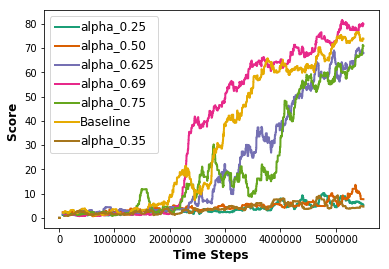

In [16]:
x = np.linspace(0,5500000,5500000)
x_new = np.linspace(0,5500000,100)
label = ["alpha_0.25", "alpha_0.50", "alpha_0.625", "alpha_0.69", "alpha_0.75", "Baseline", "alpha_0.35" ]
for experiment in range(params['experiments']):
    error = np.std(score_all_runs[experiment][0])
    plt.plot(x, score_all_runs[experiment][0], label =label[experiment] , linewidth = 2, color = colors[experiment])  
    plt.fill_between(x, score_all_runs[experiment][0]-error, score_all_runs[experiment][0]+error, color=colors_error[experiment])

plt.xlabel("Time Steps", fontsize=12, weight='bold')
plt.ylabel("Score ",fontsize=12, weight='bold')
#plt.fill_between(x, baseline_avgscore-baseline_stddevscore, baseline_avgscore+baseline_stddevscore, color='red')
plt.legend(prop={'size': 12}, loc=0, handletextpad=0.1)
plt.savefig(fname, dpi=None, orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)
plt.show()
plt.close()

/home/ml/kkheta2/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


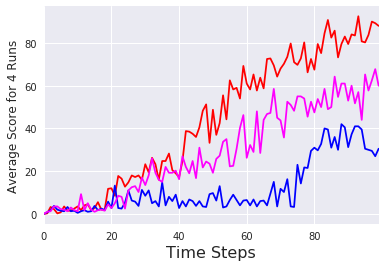

In [151]:
#sns.set(style="darkgrid")
colors = ['red', 'blue', 'magenta']
x = np.linspace(0,10000000,10000000)
x_new = np.linspace(0,10000000,100)
label = ["UNREAL", "Attentive UNREAL alpha=0.69", "Attentive UNREAL alpha=0.65"]
for experiment in range(params['experiments']):
    power_smooth = interp1d(x, experiments_avgscore_allruns[experiment])
    sns.tsplot(data=power_smooth(x_new),color=colors[experiment], legend = label[experiment])
    #sns.tsplot(data=experiments_avgscore_allruns[experiment], ci="sd", err_style="ci_band", color=colors[experiment], interpolate=True)
    
plt.xlabel("Time Steps", fontsize=16)
plt.ylabel("Average Score for 4 Runs",fontsize=12)
#plt.fill_between(x, baseline_avgscore-baseline_stddevscore, baseline_avgscore+baseline_stddevscore, color='red')
plt.legend(prop={'size': 12}, loc=0, handletextpad=0.1)
plt.show()



/home/ml/kkheta2/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


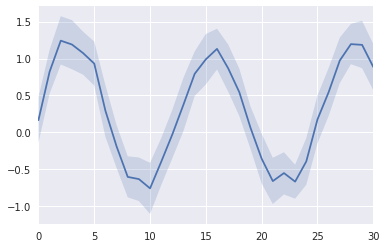

In [7]:
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
ax = sns.tsplot(data=data)